In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KawsarAhmad43/PIMA-dataset_for_diabetes/main/diabetes.csv')


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df[df.columns[:-1]]
y = df['Outcome']

X = torch.tensor(X.values)
y = torch.tensor(y.values)

X = torch.cat((X, torch.ones(X.shape[0], dtype=float).reshape(-1,1)), dim=1)

In [5]:
def log_loss(y, y_pred): ##log loss error (binary cross entropy)
  return -torch.sum((y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred)))/y.shape[0]

def sigmoid(linear):
    return 1/(1+torch.exp(-linear))

epoch_loss = []

weights = torch.zeros(9, dtype=float, requires_grad=True)
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(8000+1): 
    linear = weights.reshape(1,-1)@X.T ##one equation for all
    y_pred =  sigmoid(linear) ##logistic
    loss = log_loss(y, y_pred)
    epoch_loss.append(loss.item())

    ###backpropagation###
    loss.backward()

    ###step###
    with torch.no_grad():
        weights -= learning_rate * weights.grad

    weights.grad.zero_()

    if(epoch % 1000 == 0):
        acc = torch.sum(((y_pred>=0.5)+0 == y)+0).item()/y.shape[0]
        print('epoch: {0} - loss: {1:.5f}; acc: {2:.3f}'.format(epoch, epoch_loss[-1], acc))

epoch: 0 - loss: 0.69315; acc: 0.349
epoch: 1000 - loss: 0.61885; acc: 0.676
epoch: 2000 - loss: 0.61605; acc: 0.685
epoch: 3000 - loss: 0.61403; acc: 0.686
epoch: 4000 - loss: 0.61253; acc: 0.689
epoch: 5000 - loss: 0.61142; acc: 0.694
epoch: 6000 - loss: 0.61057; acc: 0.699
epoch: 7000 - loss: 0.60992; acc: 0.702
epoch: 8000 - loss: 0.60942; acc: 0.702


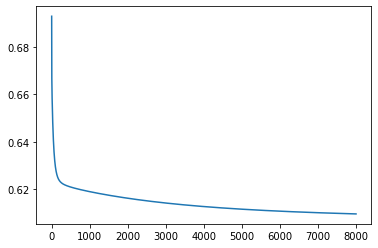

In [6]:
plt.plot(epoch_loss)